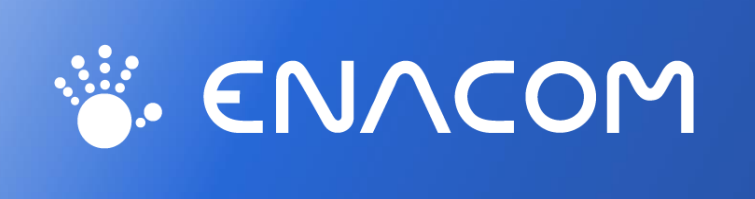

## Foco

* Base teste de 2000 a 2018
* Base de validação 2019 e 2020
* Prever a geração de energia de 2021 a 2024
* Agrupar por tipos de usina.

In [2]:
# Carregar as bibliotecas
import os
import pandas as pd
from datetime import datetime
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
# Carga de dados
# Dados divididos em 2 dataframe pois em um dataframe estava ocorrendo erro devido ao grande volume de dados
dataframes_2000_2010 = []
dataframes_2011_2020 = []

print("Carregando dados de treino...")

# pra cada ano, há um arquivo csv, que será armazenado no array de dataframes
for ano_referencia in range(2000, 2021):
    data_inicial = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    print(f"{data_inicial} Carregando dados de {ano_referencia}")

    arquivo = f"dados/GERACAO_USINA_{ano_referencia}.csv"
    df = pd.read_csv(arquivo, sep=";")

    df.drop_duplicates(inplace=True)
    
    if(ano_referencia <= 2010):    
        dataframes_2000_2010.append(df)
    else:
        dataframes_2011_2020.append(df)


data_final = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
print(f"\n{data_final} Carregando dados concluído.")

# concatenado os dataframes em armazenados no array em dois dataframes
dados1 = pd.concat(dataframes_2000_2010, ignore_index=True, axis='rows')
dados2 = pd.concat(dataframes_2011_2020, ignore_index=True, axis='rows')



Carregando dados de treino...
11/03/2024 16:49:14 Carregando dados de 2000
11/03/2024 16:49:18 Carregando dados de 2001
11/03/2024 16:49:23 Carregando dados de 2002
11/03/2024 16:49:29 Carregando dados de 2003
11/03/2024 16:49:36 Carregando dados de 2004
11/03/2024 16:49:43 Carregando dados de 2005
11/03/2024 16:49:50 Carregando dados de 2006
11/03/2024 16:49:57 Carregando dados de 2007
11/03/2024 16:50:03 Carregando dados de 2008
11/03/2024 16:50:10 Carregando dados de 2009
11/03/2024 16:50:17 Carregando dados de 2010
11/03/2024 16:50:25 Carregando dados de 2011
11/03/2024 16:50:35 Carregando dados de 2012
11/03/2024 16:50:45 Carregando dados de 2013
11/03/2024 16:50:57 Carregando dados de 2014
11/03/2024 16:51:12 Carregando dados de 2015
11/03/2024 16:51:30 Carregando dados de 2016
11/03/2024 16:52:13 Carregando dados de 2017
11/03/2024 16:52:45 Carregando dados de 2018
11/03/2024 16:53:07 Carregando dados de 2019
11/03/2024 16:53:35 Carregando dados de 2020

11/03/2024 16:54:00 Carr

In [4]:
print(f"Tamanho dataframe 1: {dados1.shape}")
print(f"Tamanho dataframe 2: {dados2.shape}")


Tamanho dataframe 1: (17339381, 12)
Tamanho dataframe 2: (36996046, 12)


In [5]:
display(dados1.head())

display(dados2.head())

din_instante id_subsistema nom_subsistema id_estado nom_estado  \
0  2000-01-01 00:00:00             N          NORTE        PA       PARA   
1  2000-01-01 00:00:00            NE       NORDESTE        AL    ALAGOAS   
2  2000-01-01 00:00:00            NE       NORDESTE        BA      BAHIA   
3  2000-01-01 00:00:00            NE       NORDESTE        BA      BAHIA   
4  2000-01-01 00:00:00            NE       NORDESTE        BA      BAHIA   

       cod_modalidadeoperacao  nom_tipousina nom_tipocombustivel  \
0                      TIPO I  HIDROELÉTRICA          Hidráulica   
1                      TIPO I  HIDROELÉTRICA          Hidráulica   
2  Pequenas Usinas (Tipo III)  HIDROELÉTRICA          Hidráulica   
3                      TIPO I  HIDROELÉTRICA          Hidráulica   
4                      TIPO I  HIDROELÉTRICA          Hidráulica   

                                   nom_usina                    ceg  \
0                                    Tucuruí  UHE.PH.PA.002889-4.01   
1                                      Xingó  UHE.PH.SE.027053-9.01   
2  Pequenas Centrais Hidroelétricas da Chesf                      -   
3                             Apolônio Sales  UHE.PH.AL.001510-5.01   
4                            Paulo Afonso II  UHE.PH.BA.027048-2.01   

   val_geracao id_ons  
0       2422.5    NaN  
1       1995.6    NaN  
2         13.0    NaN  
3        202.5    NaN  
4        269.8    NaN

din_instante id_subsistema nom_subsistema id_estado nom_estado  \
0  2011-01-01 00:00:00             N          NORTE        MA   MARANHAO   
1  2011-01-01 00:00:00             N          NORTE        MA   MARANHAO   
2  2011-01-01 00:00:00             N          NORTE        PA       PARA   
3  2011-01-01 00:00:00             N          NORTE        PA       PARA   
4  2011-01-01 00:00:00            NE       NORDESTE        AL    ALAGOAS   

  cod_modalidadeoperacao  nom_tipousina nom_tipocombustivel   nom_usina  \
0                 TIPO I        TÉRMICA    Óleo Combustível  Geramar II   
1                 TIPO I        TÉRMICA    Óleo Combustível   Geramar I   
2                 TIPO I  HIDROELÉTRICA          Hidráulica     Tucuruí   
3                 TIPO I  HIDROELÉTRICA          Hidráulica   Curuá-Una   
4                 TIPO I  HIDROELÉTRICA          Hidráulica       Xingó   

                     ceg  val_geracao id_ons  
0  UTE.PE.MA.029668-6.01         0.00    NaN  
1  UTE.PE.MA.029705-4.01         0.00    NaN  
2  UHE.PH.PA.002889-4.01      2884.97    NaN  
3  UHE.PH.PA.027130-6.01        28.58    NaN  
4  UHE.PH.SE.027053-9.01      1811.87    NaN

## Análise exploratória dos dados

In [6]:
# colunas existentes. Exibir de ambos dataframes para confirmar que são as mesmas
print("Colunas dados1:", dados1.columns.tolist())
print("Colunas dados2:", dados2.columns.tolist())

Colunas dados1: ['din_instante', 'id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado', 'cod_modalidadeoperacao', 'nom_tipousina', 'nom_tipocombustivel', 'nom_usina', 'ceg', 'val_geracao', 'id_ons']
Colunas dados2: ['din_instante', 'id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado', 'cod_modalidadeoperacao', 'nom_tipousina', 'nom_tipocombustivel', 'nom_usina', 'ceg', 'val_geracao', 'id_ons']


In [7]:
# tipo de dados
dados1.dtypes

din_instante               object
id_subsistema              object
nom_subsistema             object
id_estado                  object
nom_estado                 object
cod_modalidadeoperacao     object
nom_tipousina              object
nom_tipocombustivel        object
nom_usina                  object
ceg                        object
val_geracao               float64
id_ons                     object
dtype: object

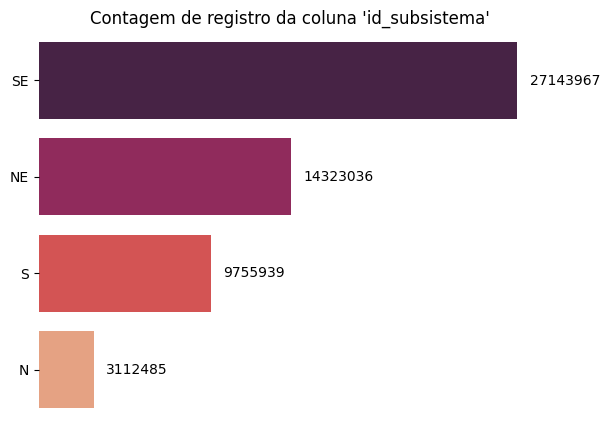

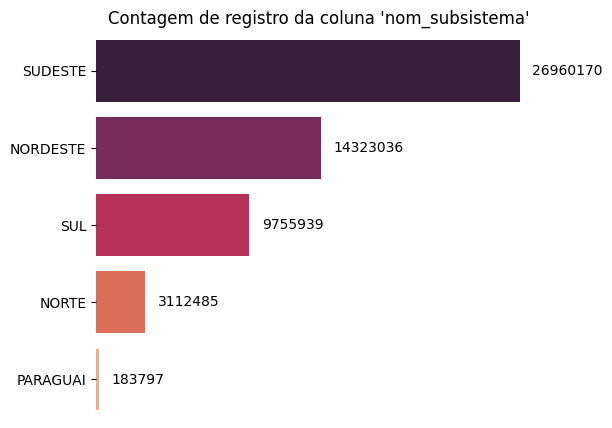

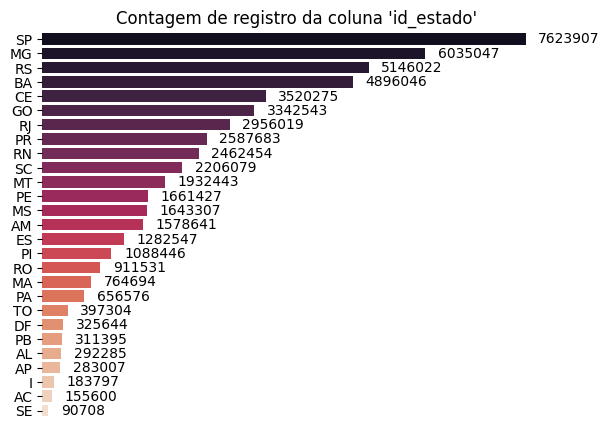

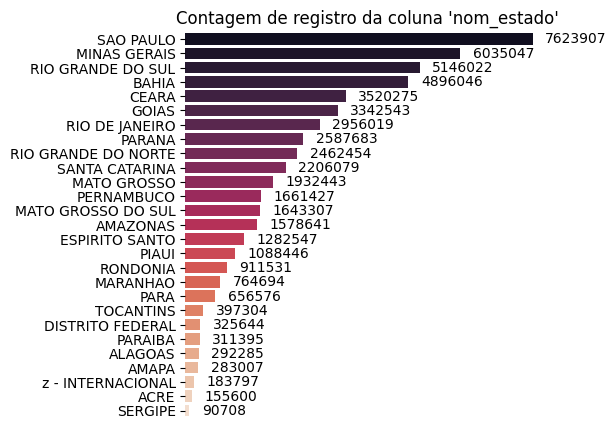

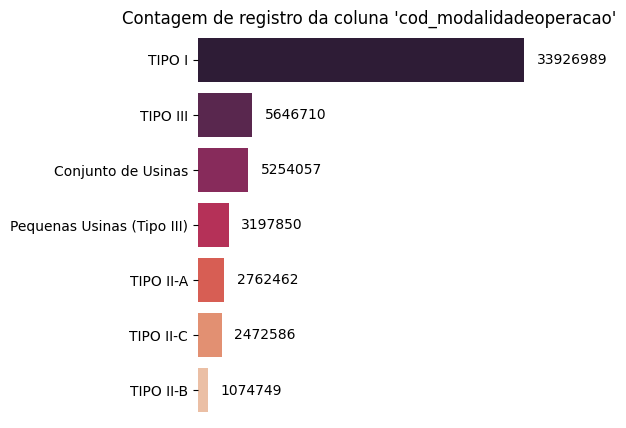

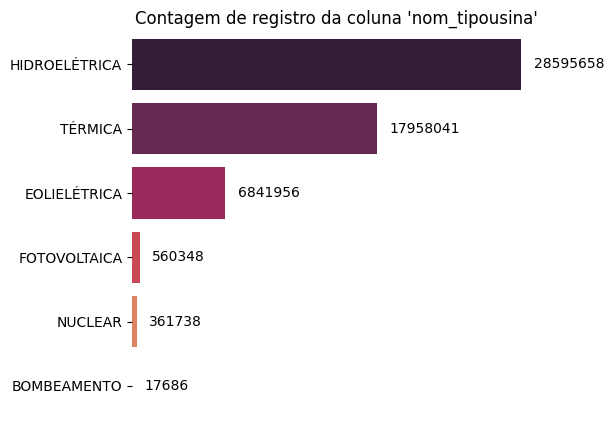

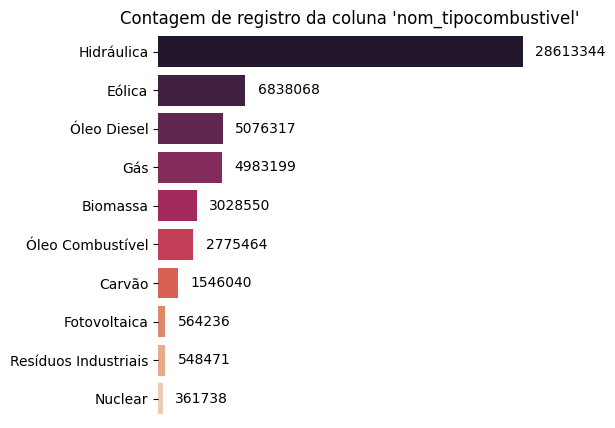

Coluna nom_usina pois possui 321 registros únicos.
Coluna ceg pois possui 263 registros únicos.
Coluna id_ons pois possui 196 registros únicos.


In [8]:
# Listagem das categorias de cada coluna, com a contagem de registros
colunas_categ = dados1.columns.tolist()
colunas_categ.remove('din_instante') # nao lista a coluna din_instante, por se tratar de datas
colunas_categ.remove('val_geracao') # nao lista a coluna val_geracao, por se tratar de valores

for categ in colunas_categ:

    total_categ = len(dados1[categ].unique())
    # print(f"\n\n======== {categ} =========")
    if total_categ > 100:
        print(f"Coluna {categ} pois possui {total_categ} registros únicos.")
    else:
        # junta a informacao dos dois dataframes
        c1 = dados1[categ].value_counts()
        c2 = dados2[categ].value_counts()
        c3 = c1.add(c2, fill_value=0)
        c3 = c3.sort_values(ascending=False)
        
        # Exibir as categorias com valores
        ax = sns.barplot(x=c3.values, y=c3.index, orient='h', palette='rocket')

        for p in ax.patches:
            ax.annotate(format(p.get_width(), '.0f'), 
                        (p.get_width(), p.get_y() + p.get_height() / 2.), 
                        ha = 'left', va = 'center', 
                        xytext = (9, 0), 
                        textcoords = 'offset points')
            
        plt.title(f"Contagem de registro da coluna '{categ}'")
        plt.tight_layout()
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        plt.xlabel(None)
        plt.ylabel(None)
        plt.xticks([])
        plt.show()


In [9]:
#### Observações sobre as informações acima:
#
# colunas id_subsistemas e nom_subsistemas são similares, exceto pelo fato de que em nom_subsistema o PARAGUAI é desvinculado do SUDESTE
# colunas id_estados e nom_estados possuem a mesma informação

### Agrupamento de dados
Agrupar dados por periodo mensal e por **nom_tipousina**

*A escolha de agrupar por tipo de usina se deve ao fato de entender que, na redução de geração de energia de uma usina, se faz necessário o acionamento de outras para fazer essa compensação*

In [10]:
# selecionado as colunas que interessa trabalhar
dados1 = dados1[['din_instante', 'nom_tipousina', 'val_geracao']]
dados2 = dados2[['din_instante', 'nom_tipousina', 'val_geracao']]

# Converte o tipo da coluna para datetime
dados1.din_instante = pd.to_datetime(dados1.din_instante)
dados2.din_instante = pd.to_datetime(dados2.din_instante)

# nova coluna com periodo do ano, para agrupamento
dados1['periodo'] = pd.to_datetime(dados1.din_instante.dt.year.astype('str') + "-" + dados1.din_instante.dt.month.astype('str'))
dados2['periodo'] = pd.to_datetime(dados2.din_instante.dt.year.astype('str') + "-" + dados2.din_instante.dt.month.astype('str'))

# # Remove a coluna de data
dados1.drop(columns=['din_instante'], inplace=True)
dados2.drop(columns=['din_instante'], inplace=True)


In [11]:
# Agrupar os dados por periodo e tipo de usina
dados_agrupados1 = dados1.pivot_table(index='periodo', columns='nom_tipousina', values='val_geracao', aggfunc='sum').reset_index()
dados_agrupados2 = dados2.pivot_table(index='periodo', columns='nom_tipousina', values='val_geracao', aggfunc='sum').reset_index()

In [12]:
# Colocar os dados em um único dataframe, e preencher os dados nulos com zero
dados = pd.concat([dados_agrupados1, dados_agrupados2], ignore_index=True, axis='rows')
dados.fillna(0, inplace=True)
dados

nom_tipousina    periodo  EOLIELÉTRICA  HIDROELÉTRICA      NUCLEAR  \
0             2000-01-01         0.000   2.771126e+07   418078.100   
1             2000-02-01         0.000   2.684993e+07   400043.100   
2             2000-03-01         0.000   2.878938e+07   400187.100   
3             2000-04-01         0.000   2.781060e+07   358885.600   
4             2000-05-01         0.000   2.881339e+07        0.000   
..                   ...           ...            ...          ...   
247           2020-08-01   6626276.382   3.219505e+07   872388.715   
248           2020-09-01   6462122.038   3.407634e+07  1341182.800   
249           2020-10-01   5593521.528   3.319925e+07  1381018.365   
250           2020-11-01   4998341.191   2.933360e+07  1340054.740   
251           2020-12-01   5443760.484   3.254358e+07  1378191.464   

nom_tipousina       TÉRMICA  BOMBEAMENTO  FOTOVOLTAICA  
0              1.443882e+06          0.0         0.000  
1              1.386004e+06          0.0         0.000  
2              1.280906e+06          0.0         0.000  
3              1.055892e+06          0.0         0.000  
4              1.334959e+06          0.0         0.000  
..                      ...          ...           ...  
247            4.941010e+06          0.0    487164.727  
248            4.631216e+06          0.0    501155.239  
249            9.141559e+06          0.0    454076.197  
250            1.016766e+07          0.0    406624.007  
251            9.785085e+06          0.0    428256.430  

[252 rows x 7 columns]

In [13]:
# Relatório geral

ProfileReport(dados).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# Descrever os dados de usina
dados.describe()

nom_tipousina                        periodo  EOLIELÉTRICA  HIDROELÉTRICA  \
count                                    252  2.520000e+02   2.520000e+02   
mean           2010-06-16 14:17:08.571428608  1.053602e+06   3.221856e+07   
min                      2000-01-01 00:00:00  0.000000e+00   2.060160e+07   
25%                      2005-03-24 06:00:00  0.000000e+00   2.937874e+07   
50%                      2010-06-16 00:00:00  1.014705e+05   3.229696e+07   
75%                      2015-09-08 12:00:00  1.755751e+06   3.487723e+07   
max                      2020-12-01 00:00:00  6.626276e+06   4.263956e+07   
std                                      NaN  1.683069e+06   4.107434e+06   

nom_tipousina       NUCLEAR       TÉRMICA  BOMBEAMENTO   FOTOVOLTAICA  
count          2.520000e+02  2.520000e+02   252.000000     252.000000  
mean           1.150171e+06  4.196880e+06     0.742032   51200.834266  
min            0.000000e+00  7.034230e+05     0.000000       0.000000  
25%            9.997636e+05  1.585797e+06     0.000000       0.000000  
50%            1.232719e+06  2.576719e+06     0.000000       0.000000  
75%            1.390948e+06  6.667784e+06     0.000000    1102.014750  
max            1.504328e+06  1.176913e+07   186.992000  501155.239000  
std            3.224351e+05  3.209303e+06    11.779389  125448.004245

In [15]:
# Listagem das categorias de cada coluna
for categ in dados.select_dtypes(include=['object']):
    total_categ = len(dados1[categ].unique())
    print(f"\n\n======== {categ} =========")
    if total_categ > 100:
        print(f"Coluna pois possui {total_categ} registros únicos.")
    else:
        print(dados[categ].value_counts())


In [16]:
# Verificar quantos registros há da usina de BOMBEAMENTO com valores acima de 0
dados.loc[dados.BOMBEAMENTO > 0]

nom_tipousina    periodo  EOLIELÉTRICA  HIDROELÉTRICA      NUCLEAR  \
197           2016-06-01   2530658.162   3.228548e+07  1249249.775   

nom_tipousina      TÉRMICA  BOMBEAMENTO  FOTOVOLTAICA  
197            6466986.212      186.992      1101.478

In [17]:
# A usina de bombeamento, por ter poucos registro, foi unida com a hidroelétrica, por ter funções similares
# Fonte: https://www.iberdrola.com/sustentabilidade/central-hidreletrica-bombeamento

dados['HIDROELÉTRICA'] = dados.HIDROELÉTRICA.add(dados.BOMBEAMENTO, fill_value=0)
dados.drop(columns='BOMBEAMENTO', inplace=True)
dados

nom_tipousina    periodo  EOLIELÉTRICA  HIDROELÉTRICA      NUCLEAR  \
0             2000-01-01         0.000   2.771126e+07   418078.100   
1             2000-02-01         0.000   2.684993e+07   400043.100   
2             2000-03-01         0.000   2.878938e+07   400187.100   
3             2000-04-01         0.000   2.781060e+07   358885.600   
4             2000-05-01         0.000   2.881339e+07        0.000   
..                   ...           ...            ...          ...   
247           2020-08-01   6626276.382   3.219505e+07   872388.715   
248           2020-09-01   6462122.038   3.407634e+07  1341182.800   
249           2020-10-01   5593521.528   3.319925e+07  1381018.365   
250           2020-11-01   4998341.191   2.933360e+07  1340054.740   
251           2020-12-01   5443760.484   3.254358e+07  1378191.464   

nom_tipousina       TÉRMICA  FOTOVOLTAICA  
0              1.443882e+06         0.000  
1              1.386004e+06         0.000  
2              1.280906e+06         0.000  
3              1.055892e+06         0.000  
4              1.334959e+06         0.000  
..                      ...           ...  
247            4.941010e+06    487164.727  
248            4.631216e+06    501155.239  
249            9.141559e+06    454076.197  
250            1.016766e+07    406624.007  
251            9.785085e+06    428256.430  

[252 rows x 6 columns]

In [18]:
# Nova coluna com o total de geração, por periodo
dados['Total'] = dados.drop(columns=['periodo']).sum(axis='columns')

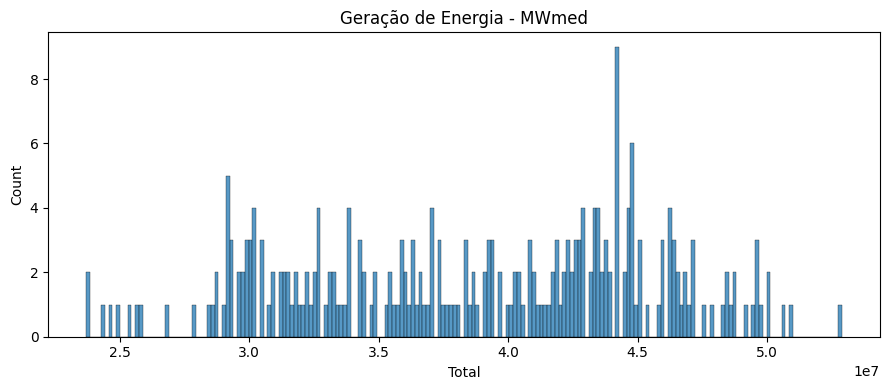

In [19]:

plt.figure(figsize=(9, 4))
sns.histplot(data=dados,x='Total', bins=200)
plt.title('Geração de Energia - MWmed')
plt.tight_layout()
plt.show()

In [71]:
dados.drop(columns='periodo').mean()

nom_tipousina
EOLIELÉTRICA     1.053602e+06
HIDROELÉTRICA    3.221856e+07
NUCLEAR          1.150171e+06
TÉRMICA          4.196880e+06
FOTOVOLTAICA     5.120083e+04
Total            3.867042e+07
dtype: float64

In [84]:
# variável que reduz o valor do MWmed para que seja exibido o valor correto nos gráficos
redutor_mwmed = 0.01 

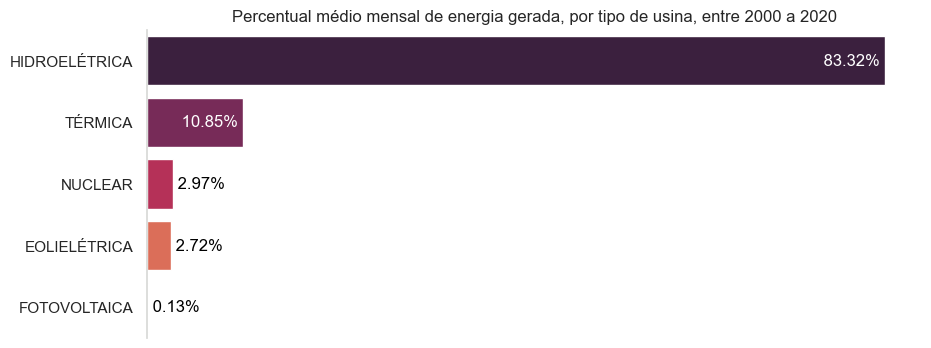

In [142]:
fig, ax = plt.subplots(figsize=(10,4))

# media mensal de energia gerada, por cada tipo de usina
media_geracao_usina = dados.drop(columns=['periodo']).mean()

# media percentual mensal de energia gerada por cada tipo de usina
media_perc_mensal_usina = media_geracao_usina / media_geracao_usina.Total * 100
media_perc_mensal_usina = media_perc_mensal_usina.sort_values(ascending=False).drop('Total')


sns.barplot(x=media_perc_mensal_usina.values, y=media_perc_mensal_usina.index, palette='rocket')

plt.title("Percentual médio mensal de energia gerada, por tipo de usina, entre 2000 a 2020")
plt.ylabel(None)

for i in range(len(media_perc_mensal_usina)):
    if(media_perc_mensal_usina.values[i] > 10):
        ha_posicao = 'right'
        color = 'white'
    else:
        ha_posicao = 'left'
        color = 'black'
        
    ax.text(media_perc_mensal_usina.values[i], i, f" {media_perc_mensal_usina.values[i]:.2f}% ", ha=ha_posicao, va='center', color=color)


ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_color("#D8D9D7")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.show()


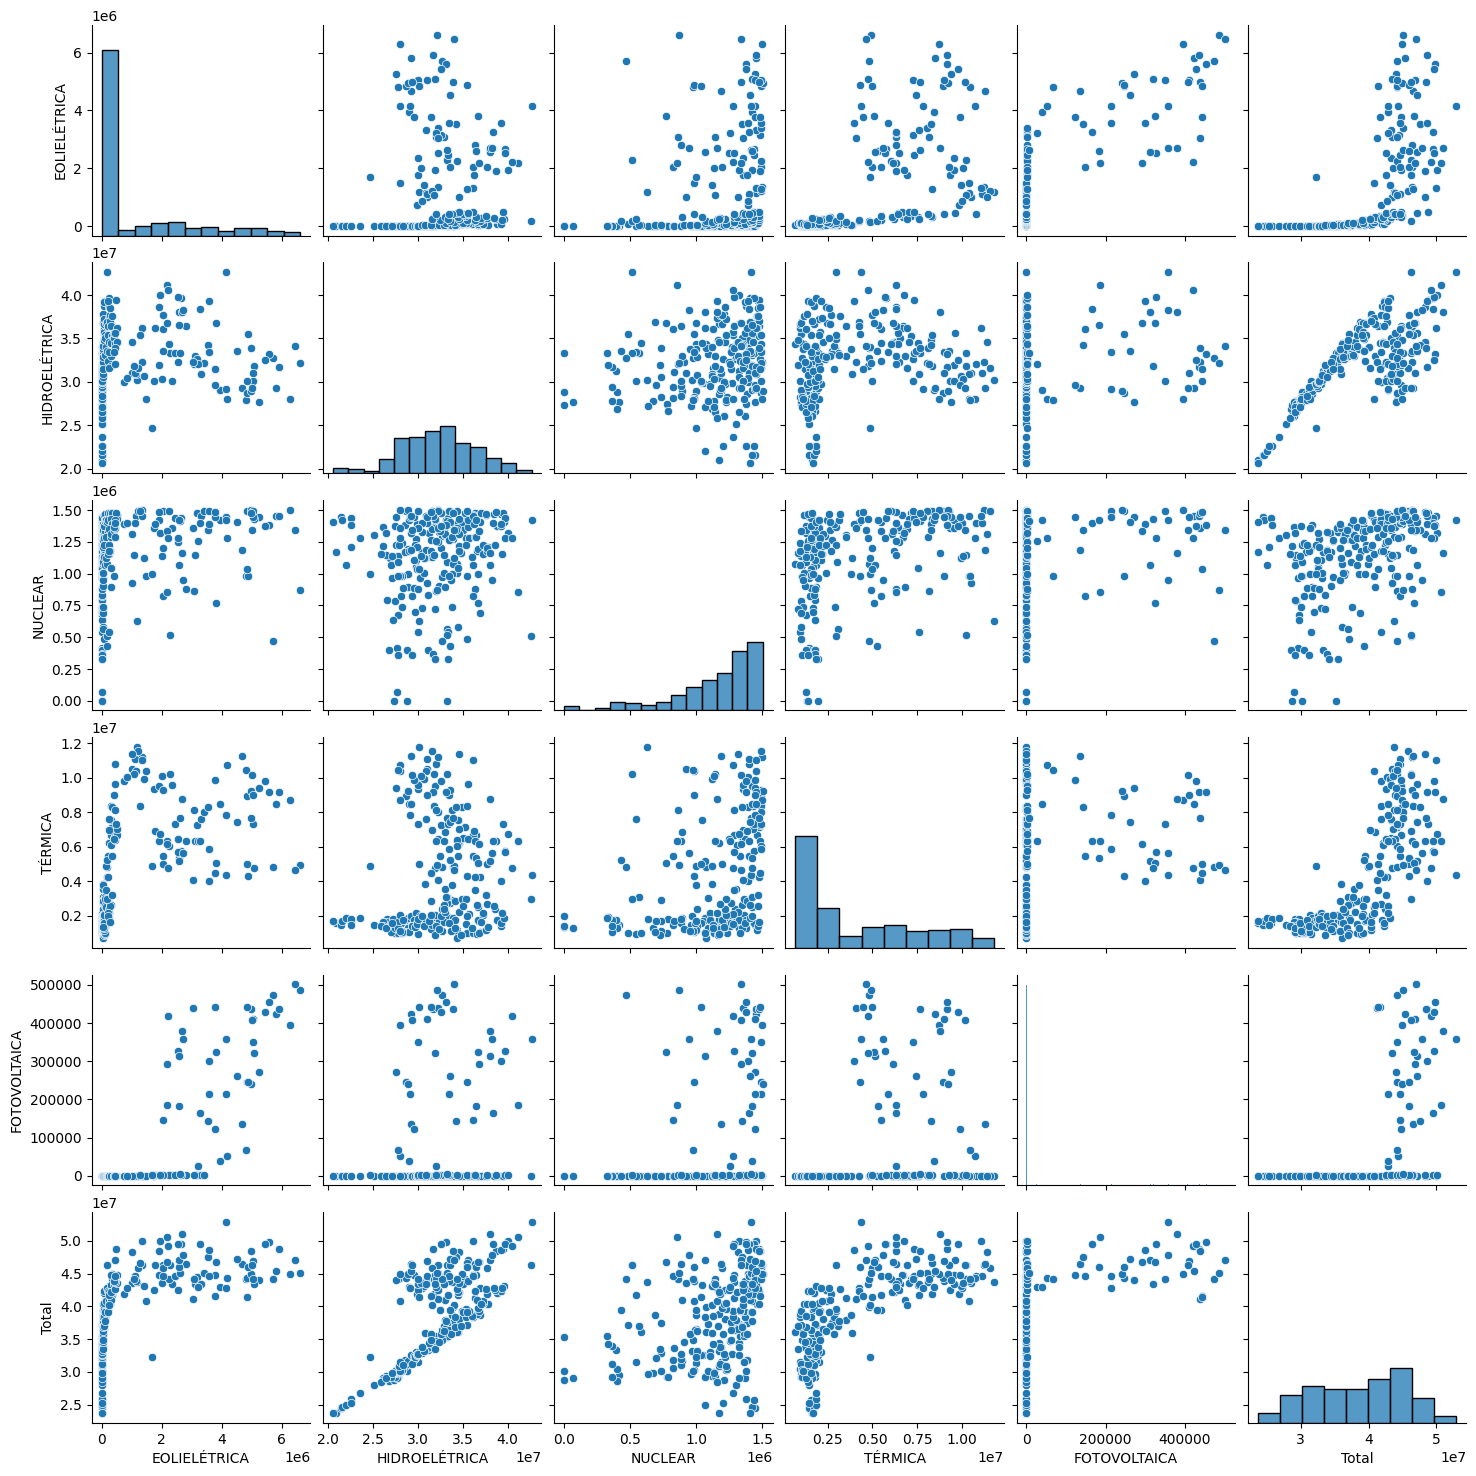

In [20]:
# análise de padrão entre as variáveis
sns.pairplot(dados)

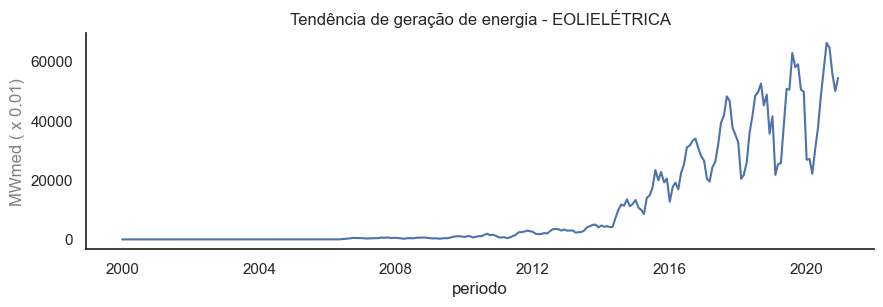

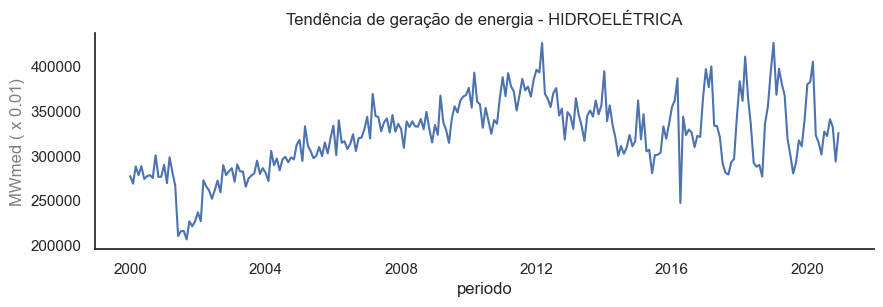

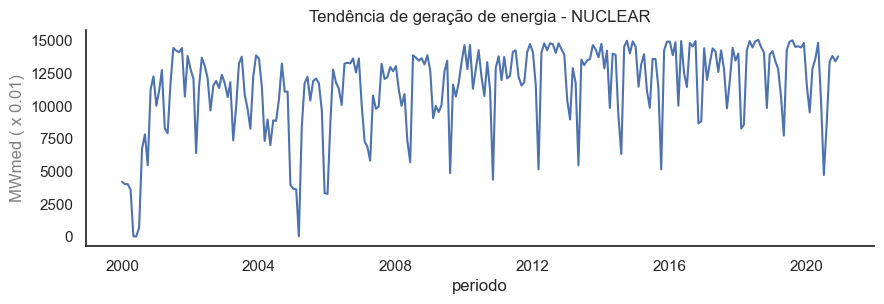

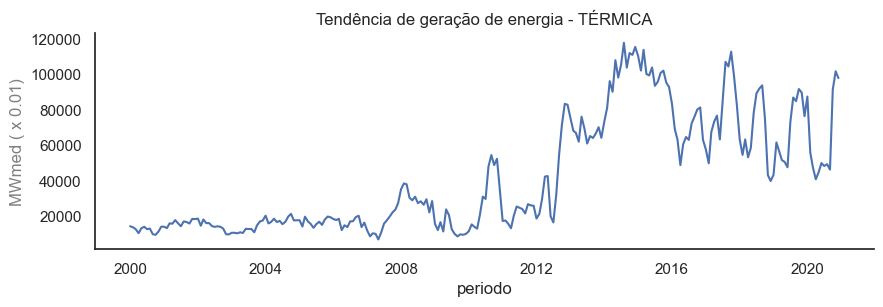

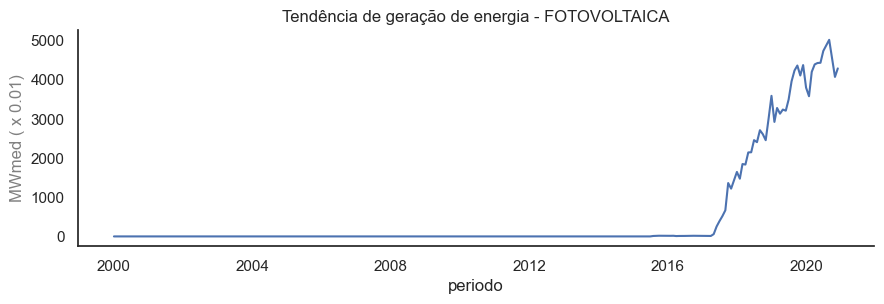

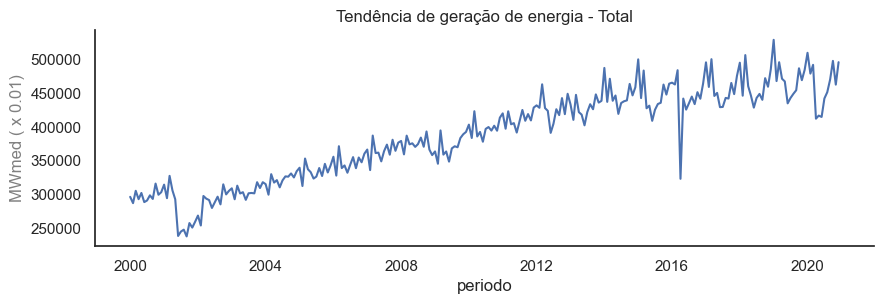

In [29]:
# Geração de gráfico por tipo de usina
for coluna in dados.columns:
    if coluna == 'periodo':
        continue

    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(9,3))
    sns.lineplot(x=dados.periodo, y=dados[coluna] * redutor_mwmed)
    plt.tight_layout()
    plt.xticks(rotation=0)
    plt.ylabel(f"MWmed ( x {redutor_mwmed})", color='gray')
    plt.title(f"Tendência de geração de energia - {coluna}")    

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

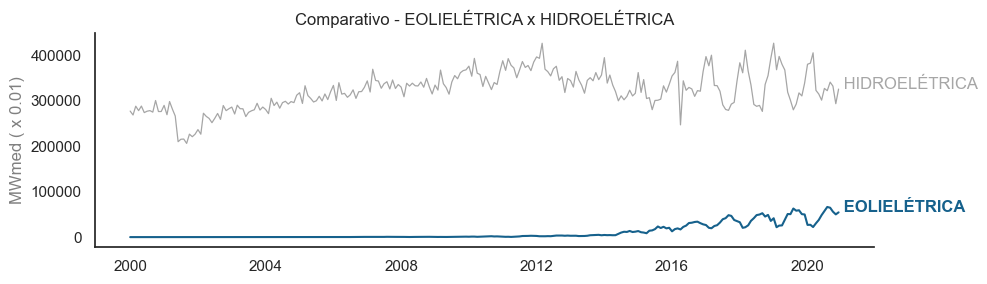

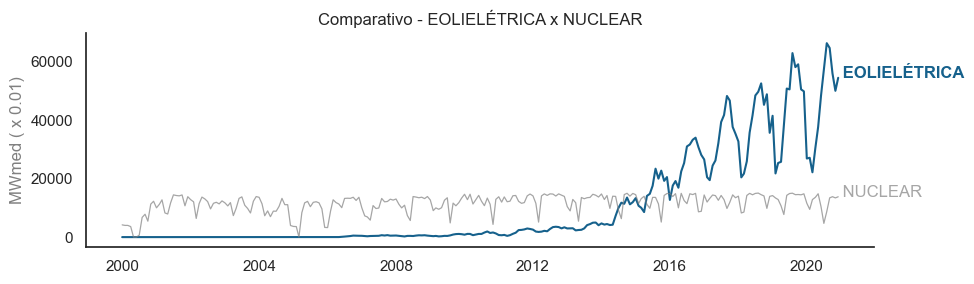

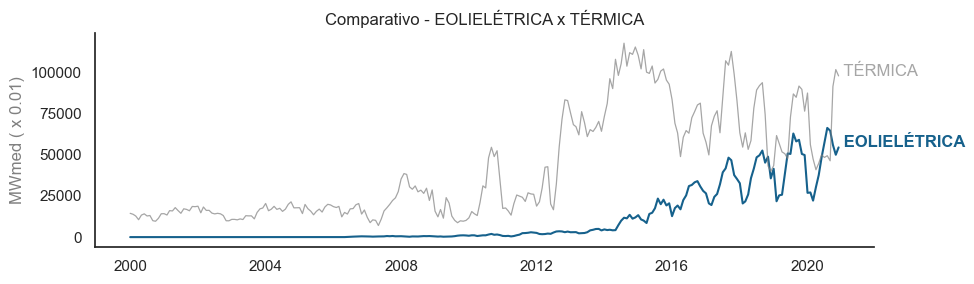

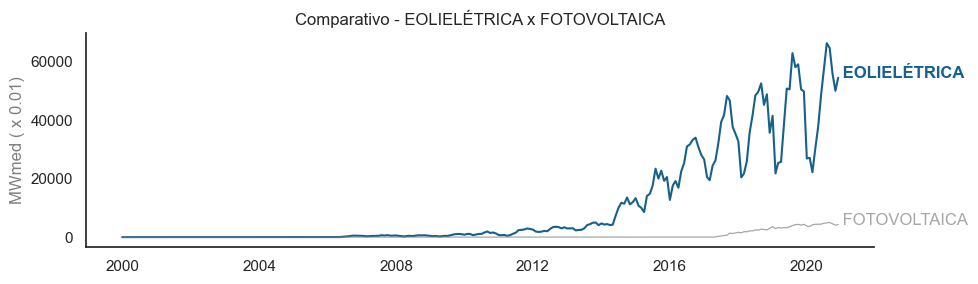

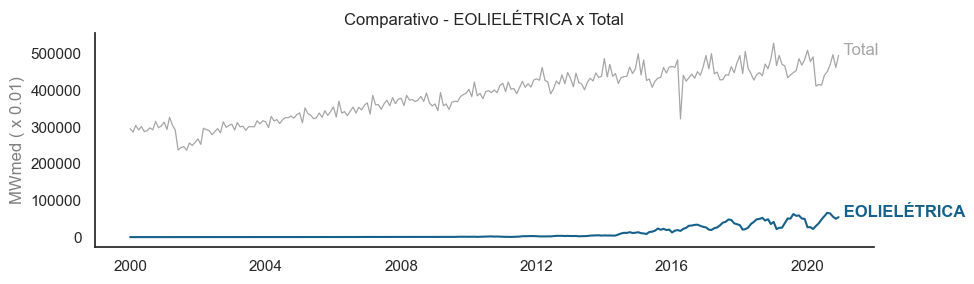

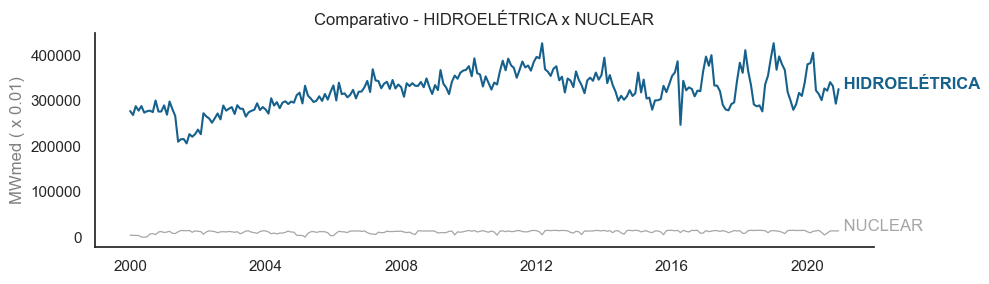

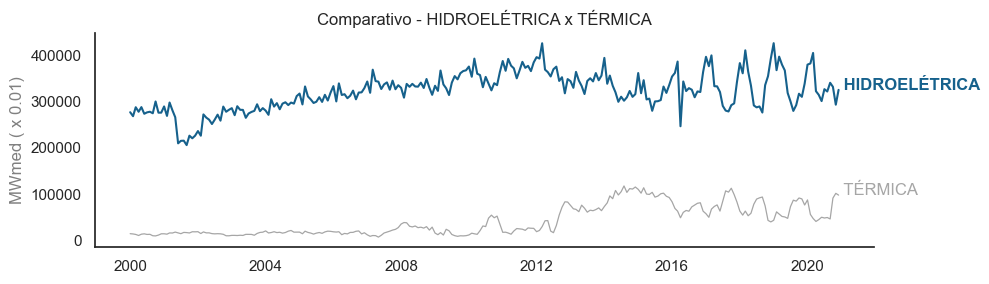

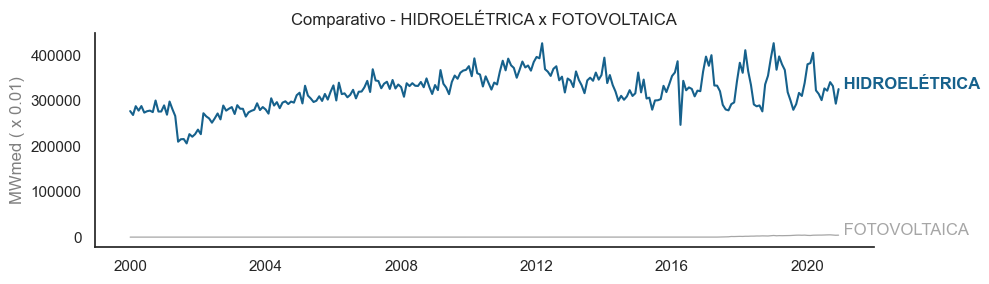

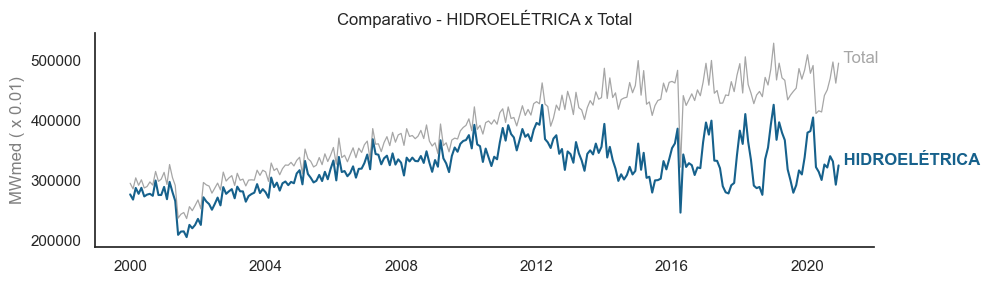

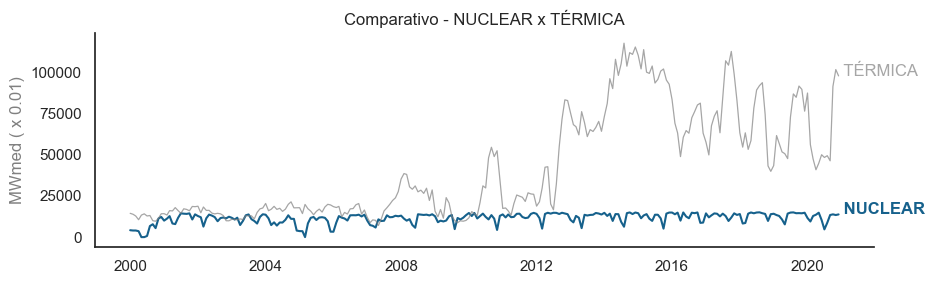

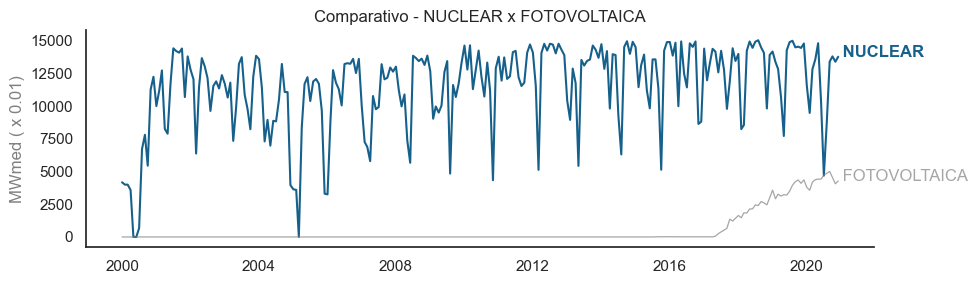

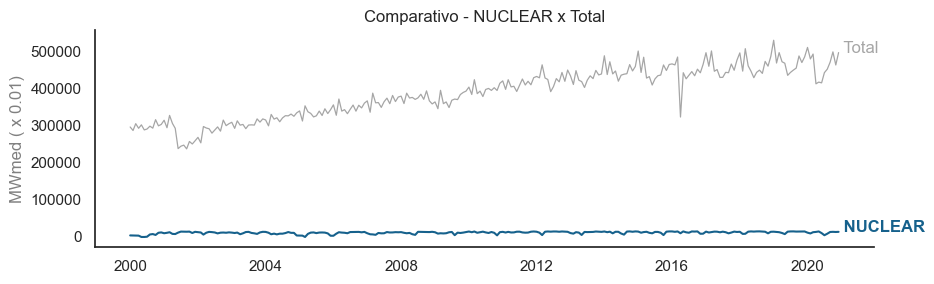

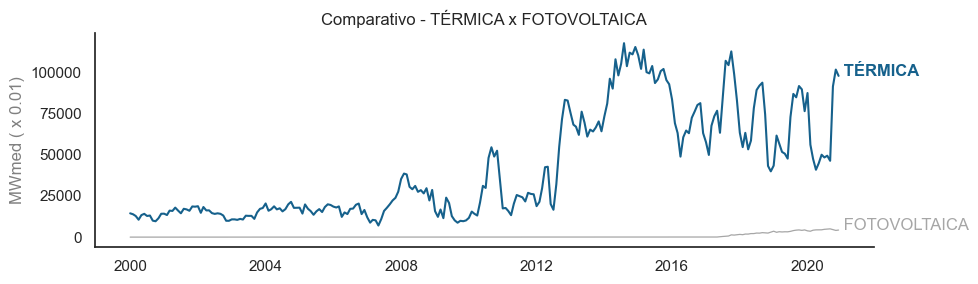

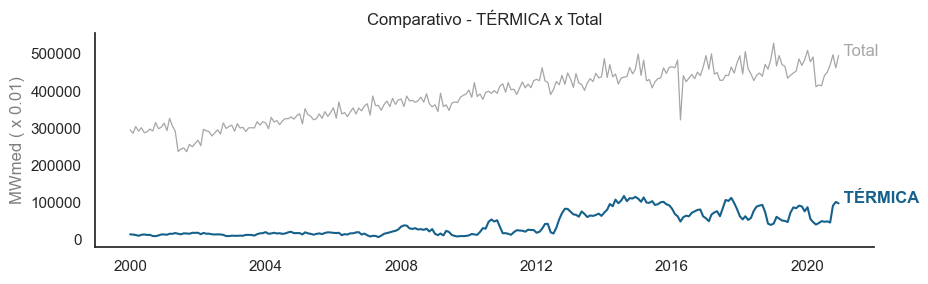

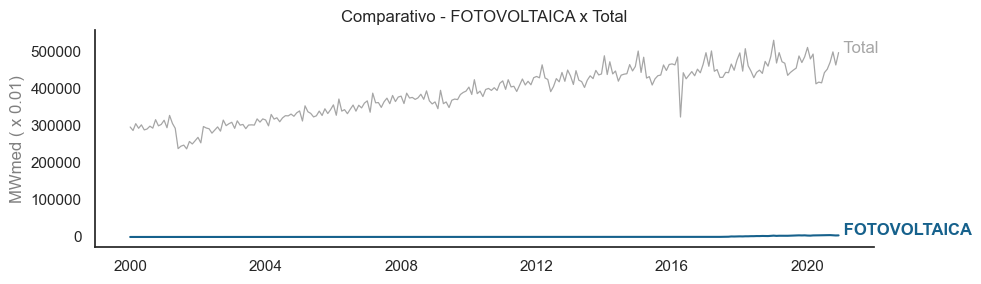

In [28]:
# Comparativo entre os tipos de usina
lista_colunas = dados.columns.tolist()

for coluna in dados.columns:
    lista_colunas.remove(coluna) # remove a coluna para nao comparar com ela mesma, e nem repetir comparação

    if coluna == 'periodo':
        continue

    for coluna2 in lista_colunas:    
        sns.set_style('white')
        fig, ax = plt.subplots(figsize=(9,3))
        sns.lineplot(x=dados.periodo, y=dados[coluna] * redutor_mwmed, color="#16618C")
        sns.lineplot(x=dados.periodo, y=dados[coluna2] * redutor_mwmed, color='gray', alpha=0.7, linewidth=0.9)
        plt.xticks(rotation=0)
        # plt.legend(frameon=False)
        plt.title(f"Comparativo - {coluna} x {coluna2}")
        plt.ylabel(f"MWmed ( x {redutor_mwmed})", color='gray')
        plt.xlabel(None)
        plt.tight_layout()
        
        plt.text(dados.periodo.iloc[-1], dados[coluna2].iloc[-1] * redutor_mwmed, f" {coluna2}", color='gray',  alpha=0.7)
        plt.text(dados.periodo.iloc[-1], dados[coluna].iloc[-1] * redutor_mwmed, f" {coluna}", color='#16618C', weight='bold')

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.show()
        

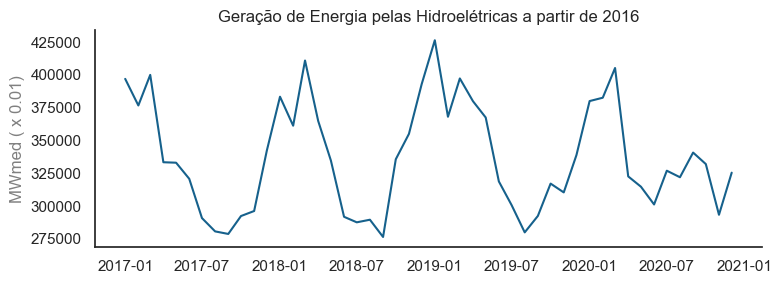

In [31]:
# grafico usado na geração do relatório técnico
fig, ax = plt.subplots(figsize=(8,3))
sns.set_style('white')
sns.lineplot(y=dados.loc[dados.periodo.dt.year > 2016, 'HIDROELÉTRICA'] * redutor_mwmed, x=dados.loc[dados.periodo.dt.year > 2016, 'periodo'], color='#16618C')
plt.xticks(rotation=0)

plt.title(f"Geração de Energia pelas Hidroelétricas a partir de 2016")
plt.ylabel(f"MWmed ( x {redutor_mwmed})", color='gray')
plt.xlabel(None)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

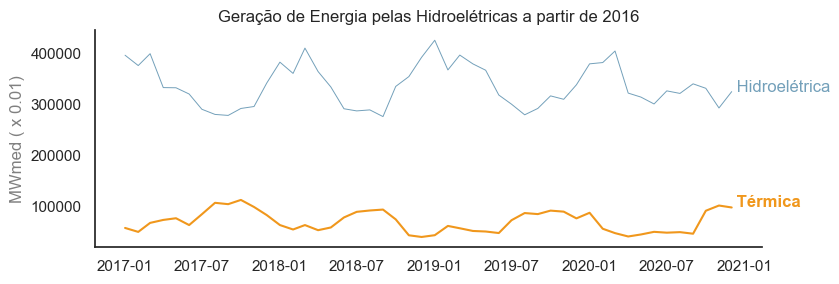

In [35]:
fig, ax = plt.subplots(figsize=(8,3))
sns.set_style('white')
sns.lineplot(y=dados.loc[dados.periodo.dt.year > 2016, 'HIDROELÉTRICA'] * redutor_mwmed, x=dados.loc[dados.periodo.dt.year > 2016, 'periodo'], color='#16618C', linewidth=0.7, alpha=0.6)
sns.lineplot(y=dados.loc[dados.periodo.dt.year > 2016, 'TÉRMICA'] * redutor_mwmed, x=dados.loc[dados.periodo.dt.year > 2016, 'periodo'], color='#f0971c')
plt.xticks(rotation=0)

plt.title(f"Geração de Energia pelas Hidroelétricas a partir de 2016")
plt.ylabel(f"MWmed ( x {redutor_mwmed})", color='gray')
plt.xlabel(None)
plt.tight_layout()

plt.text(dados.periodo.iloc[-1], dados['TÉRMICA'].iloc[-1] * redutor_mwmed, ' Térmica', color='#f0971c',  weight='bold')
plt.text(dados.periodo.iloc[-1], dados['HIDROELÉTRICA'].iloc[-1] * redutor_mwmed, ' Hidroelétrica', color='#16618C', alpha=0.6)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

## Criação de modelo preditivo

Para a modelagem preditiva serão comparados dois algorítimos que trabalham bem com series temporais: **Prophet** e **ARIMA**.

Para validar os modelos será usado a métrica **RMSE** (*Raiz do Erro Médio Quadrático*) que será verificado, para cada tipo de usina, o quão distante está o valor previsto do valor real, sendo escolhido então o algorítimo que tiver o menor RMSE possível entre cada tipo de usina.

### Dados de treino e validação

In [37]:
# separa os dados de treino e validação
dados_validacao = dados.loc[dados.periodo.dt.year >= 2019]
dados_treino = dados.loc[dados.periodo.dt.year < 2019]
dados_treino

nom_tipousina    periodo  EOLIELÉTRICA  HIDROELÉTRICA      NUCLEAR  \
0             2000-01-01         0.000   2.771126e+07   418078.100   
1             2000-02-01         0.000   2.684993e+07   400043.100   
2             2000-03-01         0.000   2.878938e+07   400187.100   
3             2000-04-01         0.000   2.781060e+07   358885.600   
4             2000-05-01         0.000   2.881339e+07        0.000   
..                   ...           ...            ...          ...   
223           2018-08-01   4966604.427   2.895673e+07  1504327.708   
224           2018-09-01   5253123.885   2.764160e+07  1448836.759   
225           2018-10-01   4519505.592   3.356723e+07  1407384.982   
226           2018-11-01   4881572.415   3.550156e+07   982467.253   
227           2018-12-01   3564527.003   3.928990e+07  1391964.576   

nom_tipousina       TÉRMICA  FOTOVOLTAICA         Total  
0              1.443882e+06         0.000  2.957322e+07  
1              1.386004e+06         0.000  2.863598e+07  
2              1.280906e+06         0.000  3.047048e+07  
3              1.055892e+06         0.000  2.922538e+07  
4              1.334959e+06         0.000  3.014835e+07  
..                      ...           ...           ...  
223            9.194591e+06    240317.069  4.486257e+07  
224            9.373720e+06    270750.601  4.398804e+07  
225            7.448764e+06    260852.931  4.720374e+07  
226            4.320570e+06    245309.114  4.593148e+07  
227            3.991181e+06    299494.345  4.853707e+07  

[228 rows x 7 columns]

In [38]:
# Plotar resultados
def comparativo_real_previsto(df, tipo):
    plt.figure(figsize=(8, 3))
    sns.set_style('whitegrid')
    plt.plot(df[['ds', 'y']].set_index('ds'), label='Real', alpha=0.6)
    plt.plot(df.ds, df.predict, label='Previsto', color='orange')
    plt.title(f'{tipo} - Previsto x Real')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.legend()
    plt.show()

Como mostra no gráfico, a geração de energia por Hidroelétrica sofre uma queda brusca em 2001
"O apagão de 2001 é o nome atribuído a uma das mais graves crises energéticas pelas quais o Brasil passou. A escassez de chuvas e a falta de planejamento e ação rápida, aliadas ao aumento da demanda por eletricidade e à alta dependência das hidrelétricas, fizeram com que houvesse uma sobrecarga no sistema elétrico do país, o que gerou um sério risco de apagão. A principal medida adotada para a contenção da crise foi o racionamento de energia, que incluiu estados das regiões Sudeste, Nordeste e Centro-Oeste do Brasil entre junho de 2001 e março de 2002."

Veja mais sobre "Apagão de 2001" em: https://brasilescola.uol.com.br/historiab/apagao.htm

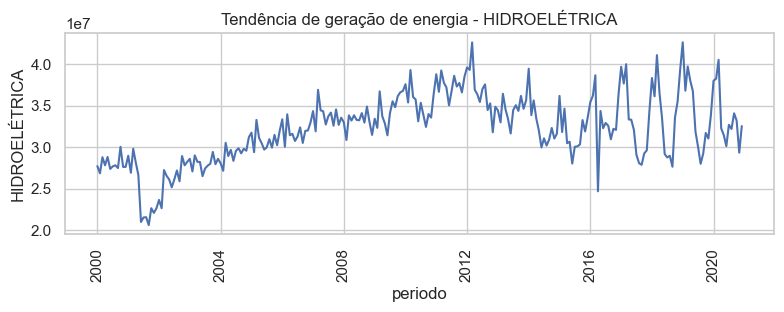

In [39]:
# Evento de crise energética de 2001
min_2001 = dados.loc[dados.periodo.dt.year == 2001].Total.min()
print(f"Valor Total Minimo 2001: {min_2001}")
print(dados.loc[(dados.periodo.dt.year == 2001) & (dados.Total < min_2001 + 1)].periodo)

Valor Total Minimo 2001: 23691935.599999998
20   2001-09-01
Name: periodo, dtype: datetime64[ns]


## Sobre o Prophet
Prophet é um algorítimo para previsão de dados de séries temporais com base em um modelo aditivo onde tendências não lineares são ajustadas à sazonalidade anual, semanal e diária, além dos efeitos dos feriados. Funciona melhor com séries temporais que apresentam fortes efeitos sazonais e várias temporadas de dados históricos. O Prophet é robusto em relação à falta de dados e às mudanças na tendência e normalmente lida bem com valores discrepantes.

In [40]:
from sklearn.metrics import mean_squared_error
from prophet import Prophet

tipos = dados_treino.columns.tolist()
tipos.remove('periodo')

rmse_prophet = {}

for tipo in tipos:
    df_treino = pd.DataFrame({'ds': dados_treino['periodo'], 'y' : dados_treino[tipo]})
    df_treino['season'] = (df_treino['ds'].dt.month % 12 + 3) // 3

    df_validacao = pd.DataFrame({'ds': dados_validacao['periodo'], 'y' : dados_validacao[tipo]})
    df_validacao['season'] = (df_validacao['ds'].dt.month % 12 + 3) // 3

    modelo = Prophet()

    modelo.add_regressor('season')

    modelo.fit(df_treino)

    forecast = modelo.predict(df_validacao)

    y_predict = forecast['yhat'].tolist()

    df_validacao['predict'] = y_predict

    # Avaliar o desempenho
    rmse = mean_squared_error(df_validacao.y, y_predict, squared=False)
    rmse_prophet[tipo] = rmse

print("\nValidação do modelo Prophet. Metrica RMSE")
for tipo, rmse in rmse_prophet.items():
    print(f"{tipo:15s}: {rmse: 12.2f}")

17:18:11 - cmdstanpy - INFO - Chain [1] start processing
17:18:12 - cmdstanpy - INFO - Chain [1] done processing
17:18:13 - cmdstanpy - INFO - Chain [1] start processing
17:18:13 - cmdstanpy - INFO - Chain [1] done processing
17:18:14 - cmdstanpy - INFO - Chain [1] start processing
17:18:14 - cmdstanpy - INFO - Chain [1] done processing
17:18:14 - cmdstanpy - INFO - Chain [1] start processing
17:18:14 - cmdstanpy - INFO - Chain [1] done processing
17:18:14 - cmdstanpy - INFO - Chain [1] start processing
17:18:15 - cmdstanpy - INFO - Chain [1] done processing
17:18:15 - cmdstanpy - INFO - Chain [1] start processing
17:18:15 - cmdstanpy - INFO - Chain [1] done processing



Validação do modelo Prophet. Metrica RMSE
EOLIELÉTRICA   :   1344598.85
HIDROELÉTRICA  :   3611756.63
NUCLEAR        :    293962.11
TÉRMICA        :   3765860.27
FOTOVOLTAICA   :    228267.17
Total          :   2267528.64


### Sobre ARIMA
 ARIMA (*AutoRegressive Integrated Moving Average*) é um modelo de previsão de série temporal que incorpora medidas de autocorrelação para modelar estruturas temporais dentro dos dados de série temporal para prever valores futuros. A parte de autorregressão do modelo mede a dependência de uma amostra específica com algumas observações anteriores. Estas diferenças são medidas e integradas para tornar os padrões de dados estacionários ou minimizar a correlação óbvia com dados passados ​​(uma vez que a independência linear e a ausência de colinearidade são um dos pressupostos fundamentais do modelo de regressão linear ). Depois disso, uma média móvel ajuda a condensar e destacar características significativas dos dados.

In [41]:
## Executando modelo baseline, para comparativo com o Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

rmse_arima = {}

tipos = dados_treino.columns.tolist()
tipos.remove('periodo')

for tipo in tipos:
    # Separar os dados de treinamento e teste
    x_train = dados_treino[['periodo', tipo]].set_index('periodo')
    x_test = dados_validacao[['periodo', tipo]].set_index('periodo')

    # Ajustar o modelo ARIMA
    modelo = ARIMA(x_train, order=(1, 0, 0))
    modelo_ajustado = modelo.fit()

    # Fazer previsões
    previsoes = modelo_ajustado.forecast(steps=len(x_test))

    # Avaliar o desempenho
    rmse = mean_squared_error(x_test, previsoes, squared=False)
    
    rmse_arima[tipo] = rmse
    print(f"{tipo:15s}: {rmse: 12.2f}")



EOLIELÉTRICA   :   1998304.46
HIDROELÉTRICA  :   3325536.55
NUCLEAR        :    279328.04
TÉRMICA        :   3278781.46
FOTOVOLTAICA   :    119934.96
Total          :   5187182.58


### Comparativo entre Prophet e ARIMA

In [42]:
df_arima = pd.DataFrame(list(rmse_arima.items()), columns=['Tipo', 'RMSE'])
df_arima.set_index('Tipo', inplace=True)

df_prophet = pd.DataFrame(list(rmse_prophet.items()), columns=['Tipo', 'RMSE'])
df_prophet.set_index('Tipo', inplace=True)


In [ ]:
# reduz a escala do RMSE para os números do eixo X ficaram legíveis
redutor_rmse = 0.1

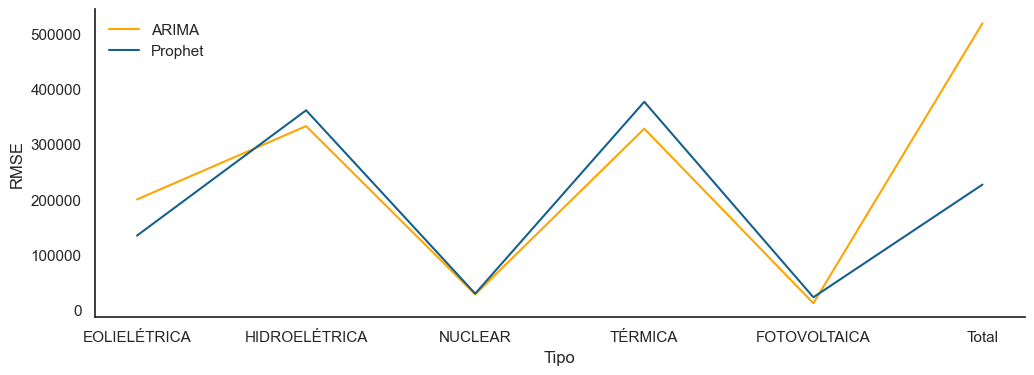

In [143]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,4))
        
sns.lineplot(df_arima * redutor_rmse, y='RMSE', x='Tipo', color='orange', label='ARIMA')
sns.lineplot(df_prophet * redutor_rmse,  y='RMSE', x='Tipo', color='#16618C', label='Prophet')

plt.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### Ajustes de parametros do ARIMA
Para cada tipo de usina, levou-se em consideração os parâmetros p, d e q são usados para definir a ordem do modelo e influenciar como ele modela os padrões nos dados de séries temporais:
* p (AR): Representa o número de valores anteriores da série temporal usados para prever o próximo valor. Quanto maior p, mais valores passados são considerados.
* d (I): Indica quantas vezes a série temporal precisa ser diferenciada para torná-la estacionária. A diferenciação remove tendências e sazonalidades.
* q (MA): Refere-se ao número de erros de previsão anteriores usados para prever o próximo valor. Quanto maior q, mais erros passados são considerados.

In [49]:
## Encontrando os melhores parametros para cada tipo de usina
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


tipos = dados_treino.columns.tolist()
tipos.remove('periodo')

tipo = 'Total'

for param in range(0,5):
    # Separar os dados de treinamento e teste
    x_train = dados_treino[['periodo', tipo]].set_index('periodo')
    x_test = dados_validacao[['periodo', tipo]].set_index('periodo')

    # Ajustar o modelo ARIMA
    modelo = ARIMA(x_train, order=(28, 0, param))
    modelo_ajustado = modelo.fit()

    # Fazer previsões
    previsoes = modelo_ajustado.forecast(steps=len(x_test))

    # Avaliar o desempenho
    rmse = mean_squared_error(x_test, previsoes, squared=False)
    print(f"param {param:2d}: {rmse: 12.2f}")



param  0:   1970979.10
param  1:   1965784.50
param  2:   1998549.07
param  3:   2119204.99
param  4:   2158951.50


In [50]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

rmse_arima_ajustado = {}

params_arima = {'EOLIELÉTRICA' :  {'p' : 17, 'd' : 1, 'q' : 7},
                'HIDROELÉTRICA' :  {'p' : 39, 'd' : 1, 'q' : 0},
                'NUCLEAR' :  {'p' : 15, 'd' : 1, 'q' : 0},
                'TÉRMICA' :  {'p' : 22, 'd' : 0, 'q' : 7},
                'FOTOVOLTAICA' :  {'p' : 19, 'd' : 1, 'q' : 7},
                'Total' :  {'p' : 28, 'd' : 0, 'q' : 1}
                }

lista_modelos_tipo = {}

for tipo, params in params_arima.items():
    # Separar os dados de treinamento e teste
    x_train = dados_treino[['periodo', tipo]].set_index('periodo')
    x_test = dados_validacao[['periodo', tipo]].set_index('periodo')

    # Ajustar o modelo ARIMA
    modelo = ARIMA(x_train, order=(params.get('p'), params.get('d'), params.get('q')))
    modelo_ajustado = modelo.fit()

    # Fazer previsões
    previsoes = modelo_ajustado.forecast(steps=len(x_test))

    # Guardar os modelos para cada tipo de usina
    lista_modelos_tipo[tipo] = modelo_ajustado
    
    # Avaliar o desempenho
    rmse = mean_squared_error(x_test, previsoes, squared=False)
    
    rmse_arima_ajustado[tipo] = rmse
    print(f"{tipo:15s}: {rmse: 12.2f}")
    
    


    


EOLIELÉTRICA   :    692097.09
HIDROELÉTRICA  :   2543886.29
NUCLEAR        :    259639.28
TÉRMICA        :   2146991.44
FOTOVOLTAICA   :     41856.92
Total          :   1965784.50


In [51]:
df_arima_ajustado = pd.DataFrame(list(rmse_arima_ajustado.items()), columns=['Tipo', 'RMSE'])
df_arima_ajustado.set_index('Tipo', inplace=True)

In [148]:
df_arima_ajustado[:-1]

RMSE
Tipo                       
EOLIELÉTRICA   6.920971e+05
HIDROELÉTRICA  2.543886e+06
NUCLEAR        2.596393e+05
TÉRMICA        2.146991e+06
FOTOVOLTAICA   4.185692e+04

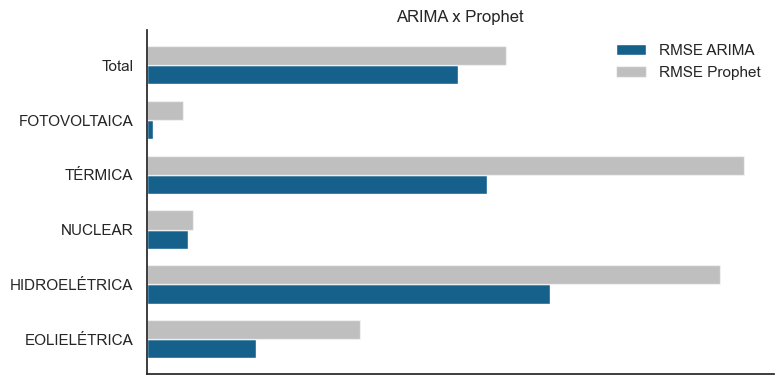

In [150]:
# Comparativo entre ARIMA com parametros ajustados e Prophet
sns.set_style('white')

fig, ax = plt.subplots(figsize=(8, 4))
# Posições das barras
y = range(len(df_arima_ajustado.index))

# Criar o gráfico de barras horizontais
plt.barh(y, df_arima_ajustado['RMSE'] * redutor_rmse, height=0.35, label='RMSE ARIMA', color='#16618C')
plt.barh([i + 0.35 for i in y], df_prophet['RMSE'] * redutor_rmse, height=0.35, label='RMSE Prophet', color='gray', alpha=0.5)

# Adicionar rótulos e legenda
plt.ylabel(None)
plt.xlabel(None)
plt.yticks([i + 0.35/2 for i in y], df_arima_ajustado.index)

plt.xticks([])
plt.legend(frameon=False)

ax.set_title("ARIMA x Prophet")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Prever geração de energia para os próximos anos, com modelo definitivo

In [61]:
# Data mais recente dos dados de validação
data_recente = dados_validacao.periodo.max()

# Criar um intervalo de datas para os próximos 4 anos
datas_futuras = pd.date_range(start=data_recente + pd.DateOffset(months=1), periods=48, freq='MS', )

print(datas_futuras)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')


In [62]:
geracao_energia_futuro = pd.DataFrame(index=datas_futuras)
    
for tipo, modelo in lista_modelos_tipo.items():
    if tipo == 'Total':
        geracao_energia_futuro[tipo] = geracao_energia_futuro.sum(axis='columns')
    else:
        previsoes = modelo.forecast(steps=len(datas_futuras)*2)
        geracao_energia_futuro[tipo] = previsoes



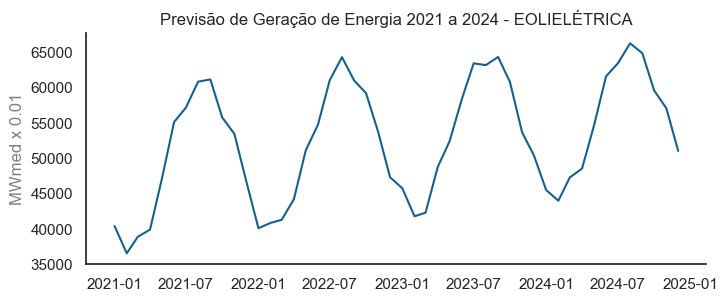

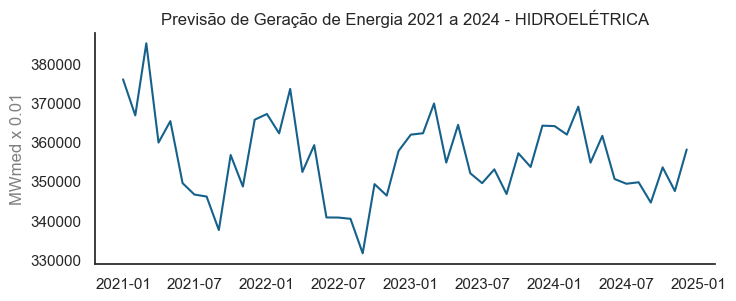

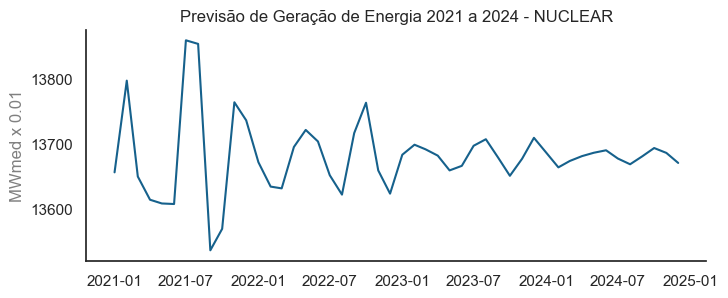

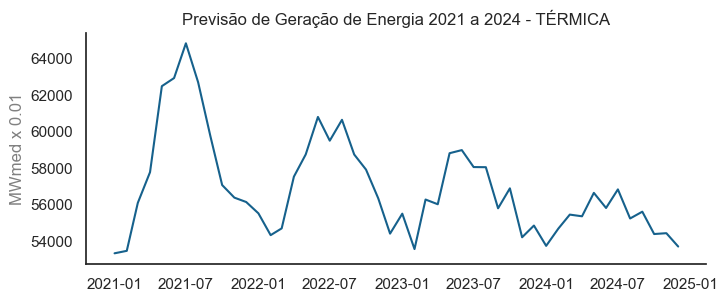

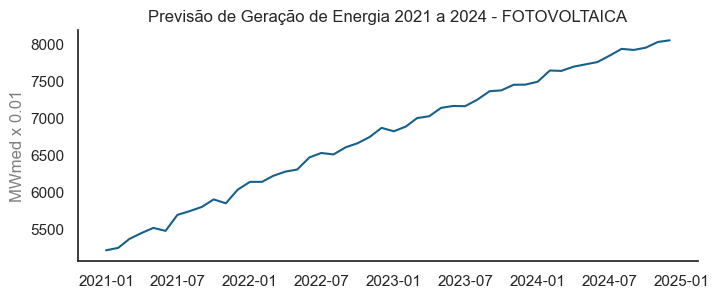

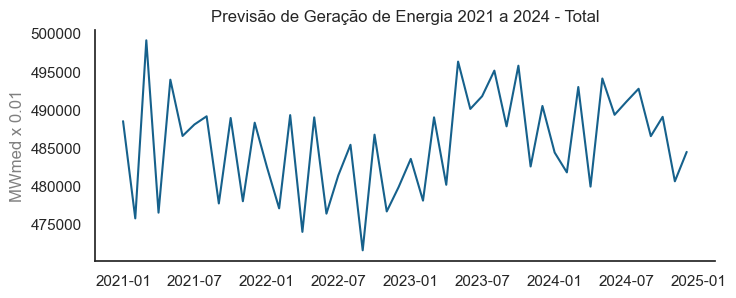

In [63]:
for tipo, _ in lista_modelos_tipo.items():
    
    # Plotar as previsões
    fig, ax = plt.subplots(figsize=(8,3))

    plt.plot(geracao_energia_futuro.index, geracao_energia_futuro[tipo] * redutor_mwmed, color='#16618C')

    ax.set_ylabel(f'MWmed x {redutor_mwmed}', color='gray')
    ax.set_xlabel(None)
    ax.set_title(f'Previsão de Geração de Energia 2021 a 2024 - {tipo}', )
    
    #remover linhas de borda
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
    plt.show()
    

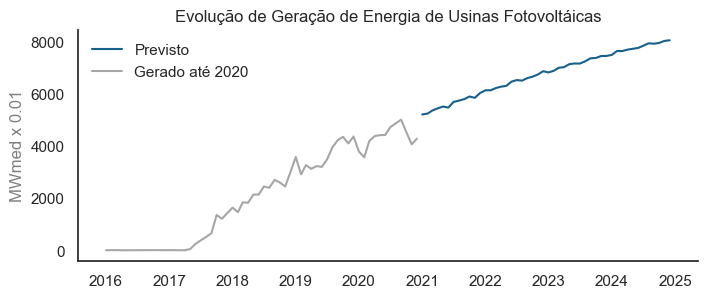

In [65]:
# Gráfico para uso no relatório técnico
 
fig, ax = plt.subplots(figsize=(8,3))

sns.set_style('white')
sns.lineplot(x=geracao_energia_futuro.index, y=geracao_energia_futuro['FOTOVOLTAICA'] * redutor_mwmed, label='Previsto', color='#16618C')
sns.lineplot(x=dados.loc[dados.periodo.dt.year > 2015, 'periodo'], y=dados.loc[dados.periodo.dt.year > 2015, 'FOTOVOLTAICA'] * redutor_mwmed, label='Gerado até 2020', color='gray', alpha=0.7)

ax.set_ylabel(f'MWmed x {redutor_mwmed}', color='gray')
ax.set_xlabel(None)
ax.set_title(f'Evolução de Geração de Energia de Usinas Fotovoltáicas')

#remover linhas de borda
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(frameon=False)

plt.show()

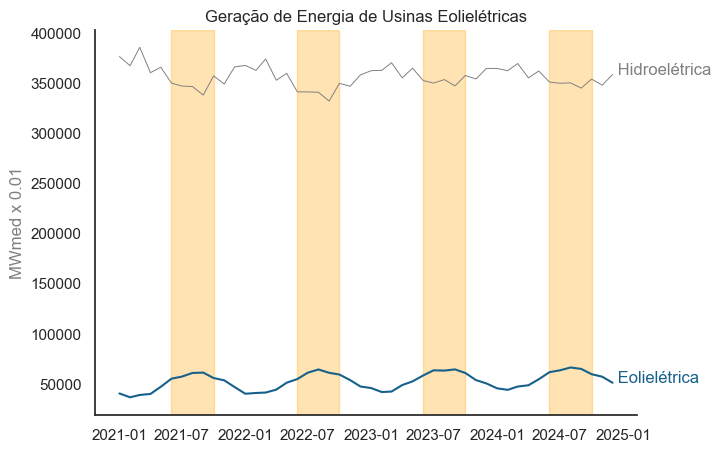

In [206]:
# Gráfico para uso no relatório técnico
sns.set_style('white') 
fig, ax = plt.subplots(figsize=(7,5))

sns.lineplot(x=geracao_energia_futuro.index, y=geracao_energia_futuro['EOLIELÉTRICA'] * redutor_mwmed, color="#16618C")
sns.lineplot(x=geracao_energia_futuro.index, y=geracao_energia_futuro['HIDROELÉTRICA'] * redutor_mwmed, color='gray', linewidth=0.7)

ax.set_ylabel(f'MWmed x {redutor_mwmed}', color='gray')
ax.set_xlabel(None)
ax.set_title(f'Geração de Energia de Usinas Eolielétricas')

#remover linhas de borda
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# colorir ponto especifico para destar os intervalos
ax.axvspan('2021-06-01', '2021-10-01', color='orange', alpha=0.3)
ax.axvspan('2022-06-01', '2022-10-01', color='orange', alpha=0.3)
ax.axvspan('2023-06-01', '2023-10-01', color='orange', alpha=0.3)
ax.axvspan('2024-06-01', '2024-10-01', color='orange', alpha=0.3)

ponto_x = geracao_energia_futuro.index[-1]
ponto_y = geracao_energia_futuro['HIDROELÉTRICA'][-1] * redutor_mwmed

plt.text(geracao_energia_futuro.index[-1], geracao_energia_futuro['HIDROELÉTRICA'][-1] * redutor_mwmed, s=' Hidroelétrica', color='gray')
plt.text(geracao_energia_futuro.index[-1], geracao_energia_futuro['EOLIELÉTRICA'][-1] * redutor_mwmed, s=' Eolielétrica', color='#16618C')

plt.show()